In [429]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
from math import *
from datetime import datetime, date, timedelta

In [430]:
import os
os.getcwd()
os.chdir("C:\\Users\\Halem\\Downloads\\final")

## Function 

In [431]:
class BlackScholes:
    
        
    def ft_bs_pricing(self, Option_type,S,K,T,r,rf,sigma):
        
        global d1
        global d2
        d1 = (log(S / K) + (r - rf + sigma ** 2 / 2) * T) / (sigma * sqrt(T)) 
        d2 = d1 - sigma* sqrt(T) 
        
        if Option_type == "Call":
            option_price = S* exp(-rf*T)* norm.cdf(d1) - K * exp(-r*T)*norm.cdf(d2)
            return option_price
        elif Option_type == "Put":
            option_price = K* exp(-r*T)* norm.cdf(-d2) - S * exp(-rf*T)*norm.cdf(-d1)
            return option_price
        else:
            return "incorrect parameters"
       
   
    def ft_delta(self, Option_type,S,K,T,r,rf,sigma):
        d = 0
        if Option_type == "Call":
             d =  norm.cdf(d1)  * exp(-rf*T)  
        elif Option_type == "Put":
             d = exp(-rf*T) * (norm.cdf(d1)-1)
        return d
    
    
    def ft_gamma(self, Option_type,S,K,T,r,rf,sigma):
        num = exp(-rf*T) * norm.cdf(d1)
        dem =  sigma*S*sqrt(T)
        return num/dem
    
    def ft_vega(self, Option_type,S,K,T,r,rf,sigma):
        
        return S*sqrt(T)*norm.pdf(d1)*exp(-rf*T)
    
    def ft_theta(self, Option_type,S,K,T,r,rf,sigma):
        t = 0
        a = (-S *norm.pdf(d1) *sigma* exp(-rf*T)) /(2*sqrt(T))
        b = rf * S * norm.cdf(d1) * exp(-rf*T) 
        c = r * K * exp(-r*T)* norm.cdf(d2)
        b2 = rf * S * norm.cdf(-d1) * exp(-rf*T) 
        c2 = r * K * exp(-r*T)* norm.cdf(-d2)
        if Option_type == "Call":
             t = a+b-c   
        elif Option_type == "Put":
            t = a-b2+c2 
        return t
    
    
    def ft_rho_dom(self,Option_type,S,K,T,r,rf,sigma):
        P1 = self.ft_bs_pricing(Option_type,S,K,T,r,rf,sigma)
        P2 = self.ft_bs_pricing(Option_type,S,K,T,r+0.0001,rf,sigma)
        return round((P2-P1)/0.0001,5)

    def ft_rho_fgn(self,Option_type,S,K,T,r,rf,sigma):
        P1 = self.ft_bs_pricing(Option_type,S,K,T,r,rf,sigma)
        P2 = self.ft_bs_pricing(Option_type,S,K,T,r,rf+0.0001,sigma)
        return round((P2-P1)/0.0001,5)
    
    
    def __init__(self,Option_type,S,K,T,r,rf,sigma):
        
        self.option_type = Option_type
        self.asset_price = S
        self.strike = K
        self.time_to_exp = T
        self.d_rate = r
        self.f_rate = rf
        self.asset_volatility = sigma
        
        self.price = self.ft_bs_pricing(Option_type,S,K,T,r,rf,sigma)
        
        
        self.delta = self.ft_delta(Option_type,S,K,T,r,rf,sigma)
        self.gamma = self.ft_gamma(Option_type,S,K,T,r,rf,sigma)
        self.theta = self.ft_theta(Option_type,S,K,T,r,rf,sigma)
        self.vega = self.ft_vega(Option_type,S,K,T,r,rf,sigma)
        self.rho_dom = self.ft_rho_dom(Option_type,S,K,T,r,rf,sigma)
        self.rho_fgn = self.ft_rho_fgn(Option_type,S,K,T,r,rf,sigma)

In [432]:
# test de la fonction
Option_type = "Call"
N = 1
S = 99.21
K = 100
r = 4.9933/100
rf = 5.27/100
sigma = 9/100
"""
T1 = '19/04/2021'
T2 = '26/05/2021'
T1 = datetime.strptime(T1, '%d/%m/%Y').date()
T2 = datetime.strptime(T2, '%d/%m/%Y').date()
T = T2 - T1
T  = T.days /360
"""
T = 46/365


bs = BlackScholes(Option_type,S,K,T,r,rf,sigma)
print( 'price = ', round( N*bs.price,4) )
print( 'delta = ', round(N*bs.delta,4) )
print( 'gamma = ', round(N*bs.gamma,4) )
print( 'vega = ', round(N*bs.vega,4) )
print( 'theta = ', round(N*bs.theta,4) )
print( 'rho_dom = ', round(N*bs.rho_dom,4) )
print( 'rho_fgn = ', round(N*bs.rho_fgn,4) )

price =  0.8938
delta =  0.4013
gamma =  0.1266
vega =  13.551
theta =  -4.6838
rho_dom =  4.9053
rho_fgn =  -5.016


## Valorisation 1

In [433]:
pd.set_option("display.max_row",200)
pd.set_option("display.max_column",60)
option1 = pd.read_excel("19042021fxoption.xlsx") 
option2 = pd.read_excel("20042021fxoption.xlsx") 

In [434]:
data = pd.DataFrame( {'Id' : option1['Deal Id'], 'Option type' : option1['C/P'], 'Spot' : option1['Spot'],
                      'Strike' : option1['Strike'],'Volatilite' : option1['Volat.'], 'Notional' : option1['Notional'],
                      'Maturite' : option1['Maturity'] ,'Time' : None, 'Taux domestique' : option1['Rate Cur2'],
                      'Taux etranger' : option1['Rate Cur1'],  'Prix' : None  }) # option1['Theor. Price']
data = data[:-1]

In [435]:
data

,Id,Option type,Spot,Strike,Volatilite,Notional,Maturite,Time,Taux domestique,Taux etranger,Prix
0,VAL_CAP_FXO:6849,Put,10.7323,11.0330,3.21,10000000,2021-06-23,None,1.404502,-0.536250,None
1,VAL_CAP_FXO:6850,Call,10.7323,11.0340,3.21,-10000000,2021-06-23,None,1.404502,-0.536250,None
2,VAL_CAP_FXO:7266,Call,10.7323,10.9240,2.80,-1200000,2021-09-22,None,1.389810,-0.513458,None
3,VAL_CAP_FXO:7265,Put,10.7323,10.9240,2.80,1200000,2021-09-22,None,1.389810,-0.513458,None
4,VAL_CAP_FXO:7270,Call,10.7323,10.9270,2.80,-1225000,2021-09-28,None,1.388502,-0.512153,None
5,VAL_CAP_FXO:7269,Put,10.7323,10.9270,2.80,1225000,2021-09-28,None,1.388502,-0.512153,None
6,VAL_CAP_FXO:7274,Call,10.7323,10.9300,2.78,-1240000,2021-10-08,None,1.385888,-0.509545,None
7,VAL_CAP_FXO:7273,Put,10.7323,10.9300,2.78,1240000,2021-10-08,None,1.385888,-0.509545,None
8,VAL_CAP_FXO:7278,Call,10.7323,10.9380,2.76,-1225000,2021-10-27,None,1.393961,-0.504521,None
9,VAL_CAP_FXO:7277,Put,10.7323,10.9380,2.76,1225000,2021-10-27,None,1.393961,-0.504521,None


In [436]:
T1 = option1['Maturity']
T2 = '19/04/2021'
date1 = pd.to_datetime(T1) - pd.to_datetime(T2)
for i in range(0,len(date1)):
    data['Time'][i] = date1[i].days /365

C:\Users\Halem\anaconda3_best\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [437]:
for i in range(len(data)):
    
    Option_type = data['Option type'][i]
    N = data['Notional'][i]
    S = data['Spot'][i]
    K = data['Strike'][i]
    r = data['Taux domestique'][i]/100
    rf = data['Taux etranger'][i]/100
    sigma = data['Volatilite'][i]/100
    T = data['Time'][i]
    
    data['Prix'][i] = N * BlackScholes(Option_type,S,K,T,r,rf,sigma).price 
    #data['Prix theorique'][i] = round(BlackScholes(Option_type,S,K,T,r,rf,sigma).price , 3)
    

C:\Users\Halem\anaconda3_best\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [438]:
data.head()

,Id,Option type,Spot,Strike,Volatilite,Notional,Maturite,Time,Taux domestique,Taux etranger,Prix
0,VAL_CAP_FXO:6849,Put,10.7323,11.033,3.21,10000000,2021-06-23,0.178082,1.404502,-0.536250,2.6507e+06
1,VAL_CAP_FXO:6850,Call,10.7323,11.034,3.21,-10000000,2021-06-23,0.178082,1.404502,-0.536250,-21483.1
2,VAL_CAP_FXO:7266,Call,10.7323,10.924,2.80,-1200000,2021-09-22,0.427397,1.389810,-0.513458,-45307.9
3,VAL_CAP_FXO:7265,Put,10.7323,10.924,2.80,1200000,2021-09-22,0.427397,1.389810,-0.513458,169419
4,VAL_CAP_FXO:7270,Call,10.7323,10.927,2.80,-1225000,2021-09-28,0.443836,1.388502,-0.512153,-47973


## Valorisation 2

In [439]:
data2 = pd.DataFrame( {'Id' : option2['Deal Id'], 'Option type' : option2['C/P'], 'Spot' : option2['Spot'],
                      'Strike' : option2['Strike'],'Volatilite' : option2['Volat.'], 'Notional' : option2['Notional'],
                      'Maturite' : option2['Maturity'] ,'Time' : None, 'Taux domestique' : option2['Rate Cur2'],
                      'Taux etranger' : option2['Rate Cur1'],  'Prix' : None  }) # option1['Theor. Price'] 
                        # 'Notional' : option2['Notional'],
data2 = data2[:-1]

In [440]:
data2.head()

,Id,Option type,Spot,Strike,Volatilite,Notional,Maturite,Time,Taux domestique,Taux etranger,Prix
0,VAL_CAP_FXO:6849,Put,10.7412,11.033,3.20,10000000,2021-06-23,None,1.396419,-0.515265,None
1,VAL_CAP_FXO:6850,Call,10.7412,11.034,3.20,-10000000,2021-06-23,None,1.396419,-0.515265,None
2,VAL_CAP_FXO:7266,Call,10.7412,10.924,2.79,-1200000,2021-09-22,None,1.387143,-0.497331,None
3,VAL_CAP_FXO:7265,Put,10.7412,10.924,2.79,1200000,2021-09-22,None,1.387143,-0.497331,None
4,VAL_CAP_FXO:7270,Call,10.7412,10.927,2.78,-1225000,2021-09-28,None,1.386305,-0.497351,None


In [441]:
T1 = option2['Maturity']
T2 = '19/04/2021'
date1 = pd.to_datetime(T1) - pd.to_datetime(T2)
for i in range(0,len(date1)):
    data2['Time'][i] = date1[i].days /365

C:\Users\Halem\anaconda3_best\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [442]:
for i in range(len(data2)):
    
    Option_type = data2['Option type'][i]
    #N = data2['Notional'][i]
    S = data2['Spot'][i]
    K = data2['Strike'][i]
    r = data2['Taux domestique'][i]/100
    rf = data2['Taux etranger'][i]/100
    sigma = data2['Volatilite'][i]/100
    T = data2['Time'][i]
    
    data2['Prix'][i] =  BlackScholes(Option_type,S,K,T,r,rf,sigma).price 
    #data['Prix theorique'][i] = round(BlackScholes(Option_type,S,K,T,r,rf,sigma).price , 3)
    

C:\Users\Halem\anaconda3_best\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [443]:
data2.head()

,Id,Option type,Spot,Strike,Volatilite,Notional,Maturite,Time,Taux domestique,Taux etranger,Prix
0,VAL_CAP_FXO:6849,Put,10.7412,11.033,3.20,10000000,2021-06-23,0.178082,1.396419,-0.515265,0.257016
1,VAL_CAP_FXO:6850,Call,10.7412,11.034,3.20,-10000000,2021-06-23,0.178082,1.396419,-0.515265,0.00243826
2,VAL_CAP_FXO:7266,Call,10.7412,10.924,2.79,-1200000,2021-09-22,0.427397,1.387143,-0.497331,0.0400108
3,VAL_CAP_FXO:7265,Put,10.7412,10.924,2.79,1200000,2021-09-22,0.427397,1.387143,-0.497331,0.135383
4,VAL_CAP_FXO:7270,Call,10.7412,10.927,2.78,-1225000,2021-09-28,0.443836,1.386305,-0.497351,0.0412012


## Grecks

In [444]:
data22 = pd.DataFrame( {'Id' : data2['Id'], 'Delta' : None, 'Gamma' : None,'Theta' : None,'Vega' : None
                      ,'dom rho' : None ,'fgn rho' : None } )
data22 = data22[:-1]

In [445]:
for i in range(len(data22)):
    
    Option_type = data2['Option type'][i]
    N = data2['Notional'][i]
    S = data2['Spot'][i]
    K = data2['Strike'][i]
    r = data2['Taux domestique'][i]/100
    rf = data2['Taux etranger'][i]/100
    sigma = data2['Volatilite'][i]/100
    T = data2['Time'][i]
    
    data22['Delta'][i] = BlackScholes(Option_type,S,K,T,r,rf,sigma).delta
    data22['Gamma'][i] = BlackScholes(Option_type,S,K,T,r,rf,sigma).gamma
    data22['Theta'][i] =  BlackScholes(Option_type,S,K,T,r,rf,sigma).theta
    data22['Vega'][i] = BlackScholes(Option_type,S,K,T,r,rf,sigma).vega
    data22['dom rho'][i] = BlackScholes(Option_type,S,K,T,r,rf,sigma).rho_dom
    data22['fgn rho'][i] = BlackScholes(Option_type,S,K,T,r,rf,sigma).rho_fgn

data22.head()

,Id,Delta,Gamma,Theta,Vega,dom rho,fgn rho
0,VAL_CAP_FXO:6849,-0.95871,0.290994,0.163785,0.408073,-1.87948,1.83393
1,VAL_CAP_FXO:6850,0.0416075,0.286852,-0.0447503,0.403364,0.07926,-0.07947
2,VAL_CAP_FXO:7266,0.318246,1.62439,-0.145738,2.50848,1.44578,-1.45904
3,VAL_CAP_FXO:7265,-0.683882,1.62439,0.0584307,2.50848,-3.19541,3.14139
4,VAL_CAP_FXO:7270,0.321558,1.61641,-0.144898,2.56752,1.5167,-1.53089


## Attribution

In [446]:
data4 = pd.DataFrame( {'P/L day 1' : data['Prix'],'P/L day 2' : None, 
                     'Real_PnL': None,
                      'Impact of price change': None,'Impact of time':None,'Impact of volatility':None,
                      'Impact of domestic rate':None, 'Impact of foreign rate':None,
                       'PnL_theorique': None,'Unexplained PnL':None })
data4 = data4[:-4]
data5 = data4.copy()
data4.head()

,P/L day 1,P/L day 2,Real_PnL,Impact of price change,Impact of time,Impact of volatility,Impact of domestic rate,Impact of foreign rate,PnL_theorique,Unexplained PnL
0,2.6507e+06,None,None,None,None,None,None,None,None,None
1,-21483.1,None,None,None,None,None,None,None,None,None
2,-45307.9,None,None,None,None,None,None,None,None,None
3,169419,None,None,None,None,None,None,None,None,None
4,-47973,None,None,None,None,None,None,None,None,None


## 1-Reevaluation

In [447]:
def attribution(Option_type,K, N,S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2):
    price_init = N * BlackScholes(Option_type,S1,K,T1,r1,rf1,sigma1).price 
    price_fin = N * BlackScholes(Option_type,S2,K,T2,r2,rf2,sigma2).price  
    price_spot = N * BlackScholes(Option_type,S2,K,T1,r1,rf1,sigma1).price 
    price_vol = N * BlackScholes(Option_type,S1,K,T1,r1,rf1,sigma2).price 
    price_time = N * BlackScholes(Option_type,S1,K,T2,r1,rf1,sigma1).price 
    price_dom = N * BlackScholes(Option_type,S1,K,T1,r2,rf1,sigma1).price 
    price_fgn = N * BlackScholes(Option_type,S1,K,T1,r1,rf2,sigma1).price 
    
    Real_PnL = price_fin-price_init
    PnL_spot = price_spot-price_init
    PnL_time = price_time-price_init
    PnL_vol = price_vol-price_init
    PnL_dom = price_dom-price_init
    PnL_fgn = price_fgn-price_init
    PnL_theorique = PnL_spot + PnL_time + PnL_vol + PnL_dom + PnL_fgn
    Unexplained_PnL = Real_PnL - PnL_theorique
    
    return ( PnL_spot, PnL_time,PnL_vol, PnL_dom,PnL_fgn, PnL_theorique,Real_PnL,Unexplained_PnL, price_init, price_fin)

In [448]:
## TEST DE LA FONCTION
Option_type = "Call"
K = 100
N = 1000

S1 = 100
T1 = 1
r1 = 0.04
rf1 = 0.08
sigma1 = 0.30

S2 = 140
T2 = 0.9
r2 = 0.06
rf2 = 0.06
sigma2 = 0.32

attribution(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)

(26538.593242069932,
 -344.29557748708066,
 736.2825435722516,
 763.4097499693562,
 969.667288152521,
 28663.657246276984,
 30730.23269480405,
 2066.5754485270663,
 9446.682150369874,
 40176.914845173924)

In [472]:
for i in range(len(data4)):
    
    Option_type = option1['C/P'][i]
    K = option1['Strike'][i]   
    N = abs(option1['Notional'][i])
    
    S1 = option1['Spot'][i]
    r1 = option1['Rate Cur1'][i]/100
    rf1 = option1['Rate Cur2'][i]/100
    sigma1 = option1['Volat.'][i]/100
    T1 = data['Time'][i]
       
    S2 = option2['Spot'][i]
    r2 = option2['Rate Cur1'][i]/100
    rf2 = option2['Rate Cur2'][i]/100
    sigma2 = option2['Volat.'][i]/100
    T2 = data2['Time'][i]
    
    data4['Impact of price change'][i] = attribution(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[0]
    data4['Impact of time'][i] = attribution(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[1]
    data4['Impact of volatility'][i] = attribution(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[2]
    data4['Impact of domestic rate'][i] = attribution(Option_type,K, N,S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[3]
    data4['Impact of foreign rate'][i] = attribution(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[4]
    data4['PnL_theorique'][i] = attribution(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[5]
    data4['Real_PnL'][i] = attribution(Option_type,K, N,S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[6]
    data4['Unexplained PnL'][i] = round(attribution(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[7],3)
    data4['P/L day 1'][i] = attribution(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[8]
    data4['P/L day 2'][i] = attribution(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[9]
    
    

In [487]:
data4

,P/L day 1,P/L day 2,Real_PnL,Impact of price change,Impact of time,Impact of volatility,Impact of domestic rate,Impact of foreign rate,PnL_theorique,Unexplained PnL
0,3.38598e+06,3.29252e+06,-93461.2,-87712.9,0,-130.386,-4082.75,-1523.93,-93449.9,-11.295
1,5365.87,6334.15,968.278,1046.39,0,-128.396,43.4349,16.7703,978.203,-9.926
2,8485.49,9331.91,846.42,890.196,0,-124.451,70.6057,11.7393,848.09,-1.67
3,343598,332776,-10821.9,-9726.55,0,-124.451,-834.89,-134.193,-10820.1,-1.791
4,8740.69,9451.91,711.228,900.659,0,-256.374,68.1113,10.1667,722.564,-11.335
5,358482,347348,-11133.2,-9934.86,0,-256.374,-813.247,-117.244,-11121.7,-11.441
6,8882.91,9568.16,685.248,896.715,0,-264.166,59.1219,6.16219,697.833,-12.585
7,373242,362106,-11135.4,-10067.4,0,-264.166,-718.899,-72.2784,-11122.8,-12.65
8,8704.22,9455.4,751.186,845.824,0,-133.336,36.031,7.75264,756.271,-5.085
9,391660,380987,-10672.4,-9977.44,0,-133.336,-461.058,-95.3762,-10667.2,-5.171


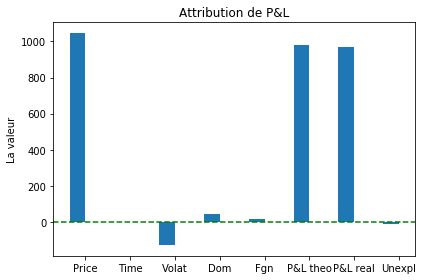

In [488]:
import matplotlib.pyplot as plt
import numpy as np

y = data4[:2].values
y = y[1] # reduire en 1 dimension
y = [y[3],y[4] ,y[5],y[6],y[7],y[8],y[2],y[9]]
y = np.array(y)
y

labels = ['Price', 'Time' , 'Volat', 'Dom', 'Fgn' ,'P&L theo','P&L real','Unexpl']
men_means = y

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width) # label='Men')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('La valeur')
ax.set_title('Attribution de P&L')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()

#ax.bar_label(rects1, padding=3)

fig.tight_layout()
plt.axhline(y=0,color='green',linestyle='--')
plt.show()

## 2-Methode des sensibilités

In [489]:
def attribution2(Option_type,K, N,S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2):
    
    # price 
    bs = BlackScholes(Option_type,S1,K,T1,r1,rf1,sigma1)
    bs2 = BlackScholes(Option_type,S2,K,T2,r2,rf2,sigma2)
    price1 = N * bs.price
    price2 = N * bs2.price
    
    # Greeks for day 1
    delta1 = N *bs.delta 
    gamma1 = N * bs.gamma 
    vega1 = N * bs.vega
    theta1 = N * bs.theta
    rho_dom1 = N * bs.rho_dom
    rho_fgn1 = N * bs.rho_fgn

    # Variation
    var_spot = S2 - S1 
    var_vol = sigma2 - sigma1
    var_time = T2 - T1
    var_rho_dom = r2 - r1
    var_rho_fgn = rf2 -rf1

    # PnL explain
    PnL_spot =  delta1*var_spot + 0.5*gamma1*var_spot**2 #+ (1/6)*(bs2.gamma -bs.gamma)*var_spot**2 
    PnL_vol = vega1*var_vol
    PnL_time = -theta1*var_time
    PnL_dom = rho_dom1*var_rho_dom 
    PnL_fgn = rho_fgn1*var_rho_fgn
    PnL_theorique = PnL_spot  + PnL_time + PnL_vol + PnL_dom + PnL_fgn
    Real_PnL = price2 - price1
    Unexplained_PnL = Real_PnL - PnL_theorique
    
    return (PnL_spot, PnL_time,PnL_vol, PnL_dom,PnL_fgn, PnL_theorique,Real_PnL,Unexplained_PnL,price1, price2)

In [490]:
for i in range(len(data5)):
    
    Option_type = option1['C/P'][i]
    K = option1['Strike'][i]   
    N = abs( option1['Notional'][i] )
    
    S1 = option1['Spot'][i]
    r1 = option1['Rate Cur1'][i]/100
    rf1 = option1['Rate Cur2'][i]/100
    sigma1 = option1['Volat.'][i]/100
    T1 = data['Time'][i]
       
    S2 = option2['Spot'][i]
    r2 = option2['Rate Cur1'][i]/100
    rf2 = option2['Rate Cur2'][i]/100
    sigma2 = option2['Volat.'][i]/100
    T2 = data2['Time'][i]
    
    data5['Impact of price change'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[0]
    data5['Impact of time'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[1]
    data5['Impact of volatility'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[2]
    data5['Impact of domestic rate'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[3]
    data5['Impact of foreign rate'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[4]
    data5['PnL_theorique'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[5]
    data5['Real_PnL'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[6]
    data5['Unexplained PnL'][i] = round(attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[7],3)
    data5['P/L day 1'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[8]
    data5['P/L day 2'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[9]
    

In [491]:
data5

,P/L day 1,P/L day 2,Real_PnL,Impact of price change,Impact of time,Impact of volatility,Impact of domestic rate,Impact of foreign rate,PnL_theorique,Unexplained PnL
0,3.38598e+06,3.29252e+06,-93461.2,-87765.7,0,-131.462,-4082.86,-1523.96,-93504,42.717
1,5365.87,6334.15,968.278,994.326,0,-129.461,43.355,16.7156,924.935,43.343
2,8485.49,9331.91,846.42,872.889,0,-124.896,70.5124,11.7067,830.212,16.208
3,343598,332776,-10821.9,-9743.86,0,-124.896,-834.996,-134.222,-10838,16.096
4,8740.69,9451.91,711.228,883.405,0,-258.227,68.0384,10.139,703.355,7.873
5,358482,347348,-11133.2,-9952.11,0,-258.227,-813.329,-117.269,-11140.9,7.774
6,8882.91,9568.16,685.248,879.789,0,-266.112,59.0929,6.14613,678.915,6.333
7,373242,362106,-11135.4,-10084.4,0,-266.112,-718.933,-72.2925,-11141.7,6.271
8,8704.22,9455.4,751.186,830.219,0,-133.845,36.0572,7.73029,740.161,11.025
9,391660,380987,-10672.4,-9993.04,0,-133.845,-461.028,-95.3953,-10683.3,10.932


In [493]:
data4

,P/L day 1,P/L day 2,Real_PnL,Impact of price change,Impact of time,Impact of volatility,Impact of domestic rate,Impact of foreign rate,PnL_theorique,Unexplained PnL
0,3.38598e+06,3.29252e+06,-93461.2,-87712.9,0,-130.386,-4082.75,-1523.93,-93449.9,-11.295
1,5365.87,6334.15,968.278,1046.39,0,-128.396,43.4349,16.7703,978.203,-9.926
2,8485.49,9331.91,846.42,890.196,0,-124.451,70.6057,11.7393,848.09,-1.67
3,343598,332776,-10821.9,-9726.55,0,-124.451,-834.89,-134.193,-10820.1,-1.791
4,8740.69,9451.91,711.228,900.659,0,-256.374,68.1113,10.1667,722.564,-11.335
5,358482,347348,-11133.2,-9934.86,0,-256.374,-813.247,-117.244,-11121.7,-11.441
6,8882.91,9568.16,685.248,896.715,0,-264.166,59.1219,6.16219,697.833,-12.585
7,373242,362106,-11135.4,-10067.4,0,-264.166,-718.899,-72.2784,-11122.8,-12.65
8,8704.22,9455.4,751.186,845.824,0,-133.336,36.031,7.75264,756.271,-5.085
9,391660,380987,-10672.4,-9977.44,0,-133.336,-461.058,-95.3762,-10667.2,-5.171


## Graphe

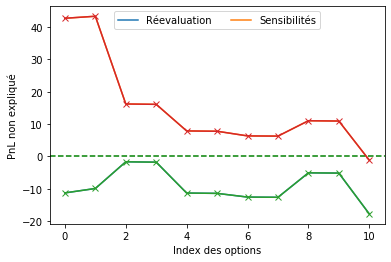

In [508]:
a = np.array(data4['Unexplained PnL'][:-5])
b = np.array(data5['Unexplained PnL'][:-1])

#arr1 = plt.arrow(head_width=0.2, color='r', length_includes_head=True)
#arr2 = plt.arrow( head_width=0.2, color='g', length_includes_head=True)


plt.subplot()
plt.plot(a)
plt.plot(b)    
plt.axhline(y=0,color='green',linestyle='--')

plt.plot(a, marker = "x")
plt.plot(b, marker = "x")
plt.xlabel('Index des options')         
plt.ylabel('PnL non expliqué')         
# plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), fancybox=True, ncol=5, labels=[ 'Réevaluation',
                                                                                       'Sensibilités'])
#plt.legend() #{[p1, p2], ['Sen','Rev'])
plt.show() 

#plt.savefig('pnl_non_explique.png', bbox_inches='tight')
#plt.show()

## Sensibilité à la volatilite

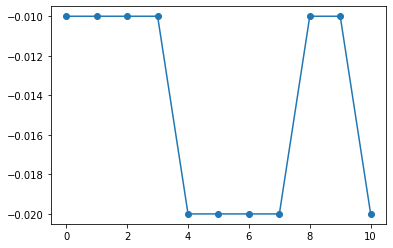

In [510]:
x = np.around( 100*(option2['Volat.']/100 - option1['Volat.']/100 ), 3) # difference de volatilite de notre portefeuille
x = x[:-6]
plt.plot(x, marker = "o")

In [512]:
volatilite = np.around( np.arange(-0.5,0.5,0.05) , 3)

In [520]:
data6 = pd.DataFrame( {'Volatilité' : volatilite,
                      'Impact of price change': None,'Impact of time':None,'Impact of volatility':None,
                      'Impact of domestic rate':None, 'Impact of foreign rate':None,
                       'PnL_theorique': None,  'Real_PnL': None, 'Unexplained PnL':None })

In [521]:
for i in range(len(data6)):
    
    Option_type = option1['C/P'][1]
    K = option1['Strike'][1]   
    N = abs( option1['Notional'][1] )
    
    S1 = option1['Spot'][1]
    r1 = option1['Rate Cur1'][1]/100
    rf1 = option1['Rate Cur2'][1]/100
    sigma1 = option1['Volat.'][1]/100
    T1 = data['Time'][1]
       
    S2 = option2['Spot'][1]
    r2 = option2['Rate Cur1'][1]/100
    rf2 = option2['Rate Cur2'][1]/100
    sigma2 = (option1['Volat.'][1]/100 + data6['Volatilité'][i]/100)
    T2 = data2['Time'][1]
    
    data6['Impact of price change'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[0]
    data6['Impact of time'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[1]
    data6['Impact of volatility'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[2]
    data6['Impact of domestic rate'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[3]
    data6['Impact of foreign rate'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[4]
    data6['PnL_theorique'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[5]
    data6['Real_PnL'][i] = attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[6]
    data6['Unexplained PnL'][i] = round(attribution2(Option_type,K,N, S1,T1,r1,rf1,sigma1, S2,T2,r2,rf2,sigma2)[7],3)


C:\Users\Halem\anaconda3_best\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Halem\anaconda3_best\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Halem\anaconda3_best\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Halem\anaconda3_best\lib\site-packages\ipykernel_launcher.py:22: SettingWith

In [522]:
data6

,Volatilité,Impact of price change,Impact of time,Impact of volatility,Impact of domestic rate,Impact of foreign rate,PnL_theorique,Real_PnL,Unexplained PnL
0,-0.50,994.326,0,-6473.07,43.355,16.7156,-5418.68,-3811.5,1607.18
1,-0.45,994.326,0,-5825.77,43.355,16.7156,-4771.37,-3519.49,1251.88
2,-0.40,994.326,0,-5178.46,43.355,16.7156,-4124.06,-3189.39,934.669
3,-0.35,994.326,0,-4531.15,43.355,16.7156,-3476.76,-2818.65,658.106
4,-0.30,994.326,0,-3883.84,43.355,16.7156,-2829.45,-2404.73,424.72
5,-0.25,994.326,0,-3236.54,43.355,16.7156,-2182.14,-1945.17,236.967
6,-0.20,994.326,0,-2589.23,43.355,16.7156,-1534.83,-1437.61,97.227
7,-0.15,994.326,0,-1941.92,43.355,16.7156,-887.526,-879.732,7.794
8,-0.10,994.326,0,-1294.61,43.355,16.7156,-240.219,-269.351,-29.132
9,-0.05,994.326,0,-647.307,43.355,16.7156,407.089,395.634,-11.455


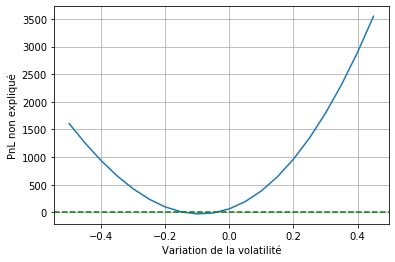

In [523]:
a = data6['Unexplained PnL']
x = data6['Volatilité']

plt.subplot()
p1 = plt.plot(x,a)   
plt.axhline(y=0,color='green',linestyle='--')

plt.xlabel('Variation de la volatilité')         
plt.ylabel('PnL non expliqué')         
plt.grid() 
#plt.legend()
plt.show() 

#plt.savefig('pnl_non_explique.png', bbox_inches='tight')
#plt.show()